# PAQUETES

In [75]:
#Importamos las liberías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
import seaborn as sns
%matplotlib inline

from pandas import read_csv
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
#import pydotplus
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.utils import class_weight

#import warnings
#warnings.filterwarnings("ignore")

# PREPARACIÓN DE DATOS

In [76]:
#Cargamos el csv
df=pd.read_csv("cleveland_cardiaco.csv",sep=",")
#Añadimos los nombres de las columnas
headers = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"]
df.columns = headers
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
298,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
299,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
300,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [77]:
#Vemos los valores que tiene cada columna y cuantas veces aparece cada uno de ellos
for i in df.columns:
    print(i,df[i].value_counts())

age 58.0    19
57.0    17
54.0    16
59.0    14
52.0    13
60.0    12
51.0    12
56.0    11
62.0    11
44.0    11
64.0    10
41.0    10
67.0     9
42.0     8
45.0     8
43.0     8
63.0     8
53.0     8
55.0     8
61.0     8
65.0     8
50.0     7
66.0     7
46.0     7
48.0     7
47.0     5
49.0     5
35.0     4
70.0     4
68.0     4
39.0     4
69.0     3
71.0     3
40.0     3
34.0     2
37.0     2
38.0     2
29.0     1
77.0     1
74.0     1
76.0     1
Name: age, dtype: int64
sex 1.0    205
0.0     97
Name: sex, dtype: int64
cp 4.0    144
3.0     86
2.0     50
1.0     22
Name: cp, dtype: int64
trestbps 120.0    37
130.0    36
140.0    32
110.0    19
150.0    17
138.0    12
128.0    12
160.0    11
125.0    11
112.0     9
132.0     8
118.0     7
108.0     6
124.0     6
135.0     6
134.0     5
152.0     5
100.0     4
145.0     4
170.0     4
122.0     4
126.0     3
136.0     3
115.0     3
180.0     3
142.0     3
105.0     3
102.0     2
146.0     2
144.0     2
148.0     2
178.0     2
94.0    

In [78]:
#Información del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    float64
 1   sex       302 non-null    float64
 2   cp        302 non-null    float64
 3   trestbps  302 non-null    float64
 4   chol      302 non-null    float64
 5   fbs       302 non-null    float64
 6   restecg   302 non-null    float64
 7   thalach   302 non-null    float64
 8   exang     302 non-null    float64
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    float64
 11  ca        302 non-null    object 
 12  thal      302 non-null    object 
 13  num       302 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.2+ KB


In [79]:
# Borramos las filas en las que aparezca el valor "?"
df=df[df!="?"].dropna()

In [80]:
# Información del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 296 entries, 0 to 300
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       296 non-null    float64
 1   sex       296 non-null    float64
 2   cp        296 non-null    float64
 3   trestbps  296 non-null    float64
 4   chol      296 non-null    float64
 5   fbs       296 non-null    float64
 6   restecg   296 non-null    float64
 7   thalach   296 non-null    float64
 8   exang     296 non-null    float64
 9   oldpeak   296 non-null    float64
 10  slope     296 non-null    float64
 11  ca        296 non-null    object 
 12  thal      296 non-null    object 
 13  num       296 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 34.7+ KB


In [81]:
df['age'] = df['age'].astype(int)
df['sex'] = df['sex'].astype(int)
df['cp'] = df['cp'].astype(int)
df['trestbps'] = df['trestbps'].astype(int)
df['chol'] = df['chol'].astype(int)
df['fbs'] = df['fbs'].astype(int)
df['restecg'] = df['restecg'].astype(int)
df['thalach'] = df['thalach'].astype(int)
df['exang'] = df['exang'].astype(int)
df['slope'] = df['slope'].astype(int)
df['oldpeak'] = df['oldpeak'].astype(float)
df['thal'] = df['thal'].astype(float)
df['ca'] = df['ca'].astype(float)
df['thal'] = df['thal'].astype(float)
df['ca'] = df['ca'].astype(int)
df['thal'] = df['thal'].astype(int)
df['num'] = df['num'].astype(int)

In [82]:
# Guardamos el dataset como csv
df.to_csv("cleveland_cardiaco_py.csv", index=False)

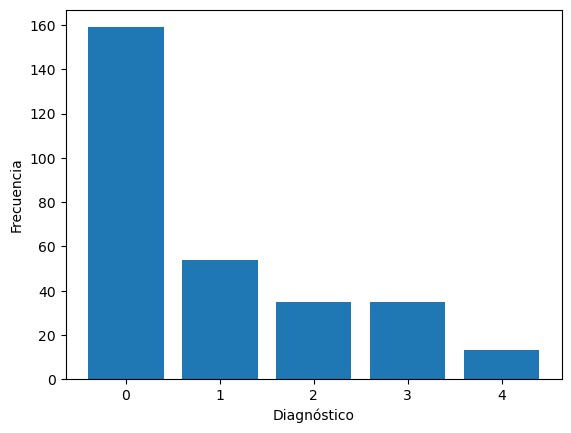

In [83]:
# Calcula la frecuencia de los valores de clase en todo el DataFrame
frecuencia_clase = df['num'].value_counts()

# Crea un gráfico de barras para visualizar la frecuencia de los valores de clase
plt.bar(frecuencia_clase.index, frecuencia_clase.values)
plt.xlabel('Diagnóstico')
plt.ylabel('Frecuencia')
plt.show()


# PREPROCESAMIENTO

In [84]:
# Dividimos entrada y salida
x = df.iloc[:, :-1]  # Características (atributos)
y = df.iloc[:, -1]  # Etiquetas (salida)
# Dividimos en datos de entrenamiento y de validación
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, shuffle=True)
x_train.columns = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal"]
x_test.columns = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal"]

#Tamaños
x.shape, y.shape

x_train.shape, y_train.shape

x_test.shape, y_test.shape

# Calculamos el máximo y mínimo
maxs = np.max(x_train, axis=0)
mins = np.min(x_train, axis=0)

ranges = maxs - mins

# Normalizamos las variables
x_train = (x_train - mins) / ranges
x_test = (x_test - mins) / ranges

# Calcula las frecuencias de clase en y_train
class_frequencies = y_train.value_counts()

# Calcula los pesos para cada clase  
#class_weights = {cls: 1.0 / freq for cls, freq in class_frequencies.items()}
#class_weights_int = {int(cls[0]): weight for cls, weight in class_weights.items()}

# Calcula los pesos de clase
class_weights = class_weight.compute_class_weight('balanced', classes=y.unique(), y=y)

# Crea un diccionario con los pesos de clase
class_weights_int = {cls: weight for cls, weight in zip(y.unique(), class_weights)}


# MODELOS

## Árbol de decisión

              precision    recall  f1-score   support

           0       0.78      0.86      0.82        36
           1       0.25      0.33      0.29         6
           2       0.40      0.33      0.36         6
           3       0.20      0.11      0.14         9
           4       0.50      0.33      0.40         3

    accuracy                           0.62        60
   macro avg       0.42      0.39      0.40        60
weighted avg       0.59      0.62      0.60        60

cross_value:  0.42518115942028983


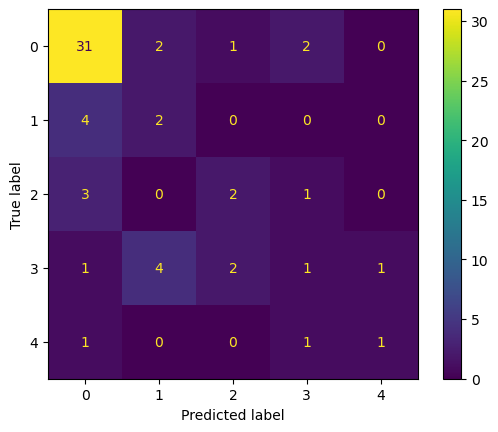

In [85]:
# modelo genérico
DT = DecisionTreeClassifier(class_weight=class_weights_int)
# entrenamos el modelo
DT.fit(x_train, y_train)
# hacer predicciones
pred_DT = DT.predict(x_test)
# informe
print(classification_report(y_test,pred_DT))
# cross value
kfold = StratifiedKFold(10)
score = cross_val_score(
    DT, x_train, y_train, cv=kfold, scoring="accuracy"
)
DT_prec=score.mean()
print("cross_value: ", DT_prec)
# matriz de confusión
mat_conf = confusion_matrix(y_test, pred_DT)
ConfusionMatrixDisplay(mat_conf).plot()
plt.show()

In [86]:
# ver opciones con otros parametros
DT_combinaciones={}
# parametros
splitter_ = ["best", "random"]
criterion_ = ["gini", "entropy"]
max_features_ = [None,"sqrt", "log2"]
porc_ = [0.2, 0.3]
# combinaciones
for c in criterion_:
    for m in max_features_:
        for s in splitter_:
            for p in [1, 2]:
                vector_parametros=[c,m,s,porc_[p-1]]
                # dividimos las instancias
                x_train, x_test, y_train, y_test = train_test_split(
                    x, y, test_size=porc_[p - 1], random_state=42, shuffle=True
                )
                x_train.columns = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal"]
                x_test.columns = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal"]

                # modelo
                DT = DecisionTreeClassifier(criterion=c, max_features=m, splitter=s, class_weight=class_weights_int)
                # entrenamos el modelo
                DT.fit(x_train, y_train)
                # hacer predicciones
                predicciones_DT = DT.predict(x_test)
                # calculamos la exactitud del modelo
                acc_1 = accuracy_score(y_test, predicciones_DT)
                # cross value
                kfold = StratifiedKFold(10)
                score = cross_val_score(DT, x_train, y_train, cv=kfold, scoring="accuracy")
                print(
                    c,
                    ",",
                    m,
                    "y",
                    s,
                    "(",
                    porc_[p - 1],
                    ")",
                    "-> accuracy_score: ",
                    acc_1,
                    "//",
                    "cross_value: ",
                    score.mean()
                )
                # añadimos al diccionario esta combinación
                DT_combinaciones[score.mean()]=vector_parametros
                
# calculamos la precisión máxima
DT_max_prec = max(DT_combinaciones)
# miramos con que parámetros se consigue esta precisión
DT_mejor_vector_parametros = DT_combinaciones[DT_max_prec]
print("mejores resultados con los parametros -> ",DT_mejor_vector_parametros)

gini , None y best ( 0.2 ) -> accuracy_score:  0.6333333333333333 // cross_value:  0.4126811594202898
gini , None y best ( 0.3 ) -> accuracy_score:  0.5168539325842697 // cross_value:  0.4642857142857143
gini , None y random ( 0.2 ) -> accuracy_score:  0.55 // cross_value:  0.4494565217391305
gini , None y random ( 0.3 ) -> accuracy_score:  0.4943820224719101 // cross_value:  0.49833333333333324
gini , sqrt y best ( 0.2 ) -> accuracy_score:  0.6 // cross_value:  0.4833333333333334
gini , sqrt y best ( 0.3 ) -> accuracy_score:  0.5280898876404494 // cross_value:  0.49952380952380954
gini , sqrt y random ( 0.2 ) -> accuracy_score:  0.5833333333333334 // cross_value:  0.48768115942028983
gini , sqrt y random ( 0.3 ) -> accuracy_score:  0.449438202247191 // cross_value:  0.46428571428571425
gini , log2 y best ( 0.2 ) -> accuracy_score:  0.48333333333333334 // cross_value:  0.47101449275362317
gini , log2 y best ( 0.3 ) -> accuracy_score:  0.5280898876404494 // cross_value:  0.5026190476190

              precision    recall  f1-score   support

           0       0.78      0.86      0.82        49
           1       0.17      0.21      0.19        14
           2       0.27      0.30      0.29        10
           3       0.50      0.15      0.24        13
           4       0.50      0.33      0.40         3

    accuracy                           0.57        89
   macro avg       0.44      0.37      0.38        89
weighted avg       0.57      0.57      0.56        89

cross_value:  0.41047619047619055


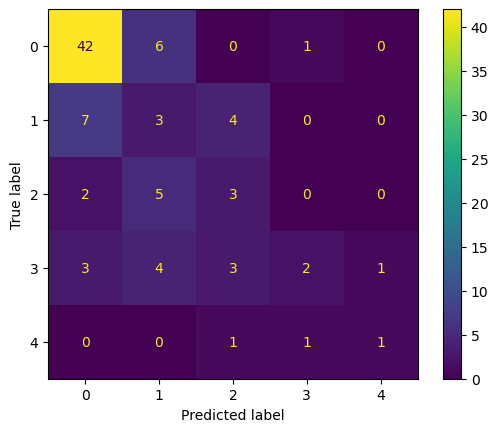

In [87]:
# mejor modelo (utilizando el vector conseguido anteriormente)
DT_mejor = DecisionTreeClassifier(criterion=DT_mejor_vector_parametros[0], max_features=DT_mejor_vector_parametros[1], splitter=DT_mejor_vector_parametros[2], class_weight=class_weights_int)
# dividimos las instancias 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=DT_mejor_vector_parametros[3], random_state=42, shuffle=True)

# entrenamos el modelo
DT_mejor.fit(x_train, y_train)
# hacer predicciones
pred_DT_mejor = DT_mejor.predict(x_test)
# informe
print(classification_report(y_test,pred_DT_mejor,zero_division=1))
# cross value
kfold = StratifiedKFold(10)
score = cross_val_score(
    DT_mejor, x_train, y_train, cv=kfold, scoring="accuracy"
)
DT_mejor_prec=score.mean()
print("cross_value: ", DT_mejor_prec)
# matriz de confusión
mat_conf = confusion_matrix(y_test, pred_DT_mejor)
ConfusionMatrixDisplay(mat_conf).plot()
plt.show()

## Random forest

              precision    recall  f1-score   support

           0       0.73      0.96      0.83        49
           1       0.12      0.07      0.09        14
           2       0.33      0.40      0.36        10
           3       0.00      0.00      0.00        13
           4       0.00      0.00      0.00         3

    accuracy                           0.58        89
   macro avg       0.24      0.29      0.26        89
weighted avg       0.46      0.58      0.51        89

cross_value:  0.5616666666666668


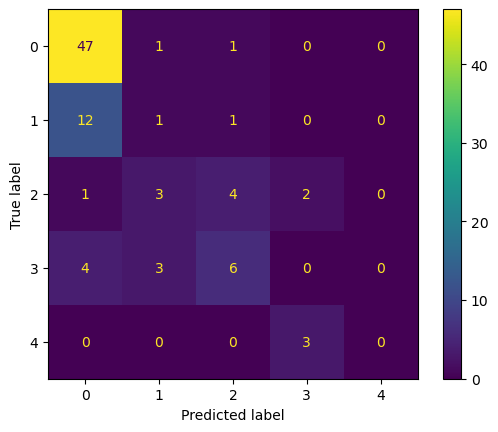

In [88]:
# modelo genérico
y_ravel= np.ravel(y)
RF = RandomForestClassifier(class_weight=class_weights_int)
# entrenamos el modelo
y_train=y_train.values.ravel()
RF.fit(x_train, y_train)
# hacer predicciones
pred_RF = RF.predict(x_test)
# informe
print(classification_report(y_test,pred_RF,zero_division=0))
# cross value
kfold = StratifiedKFold(10)
score = cross_val_score(
    RF, x_train, y_train, cv=kfold, scoring="accuracy"
)
RF_prec=score.mean()
print("cross_value: ", RF_prec)
# matriz de confusión
mat_conf = confusion_matrix(y_test, pred_RF)
ConfusionMatrixDisplay(mat_conf).plot()
plt.show()

In [89]:
# ver opciones con otros parámetros
RF_combinaciones={}
# parametros
criterion_ = ["gini", "entropy"]
max_features_ = [None,"sqrt", "log2"]
porc_ = [0.2, 0.3]
# combinaciones
for c in criterion_:
    for m in max_features_:
        for p in [1, 2]:
            vector_parametros=[c,m,porc_[p-1]]
            # dividimos las instancias
            x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=porc_[p - 1], random_state=42, shuffle=True)
            y_train=y_train.values.ravel()
            # modelo
            RF = RandomForestClassifier(criterion=c, max_features=m, class_weight=class_weights_int)
            # entrenamos el modelo
            RF.fit(x_train, y_train)
            # hacer predicciones
            predicciones_RF = RF.predict(x_test)
            # calculamos la exactitud del modelo
            acc_1 = accuracy_score(y_test, predicciones_RF)
            # cross value
            kfold = StratifiedKFold(10)
            score = cross_val_score(RF, x_train, y_train, cv=kfold, scoring="accuracy")
            print(
                c,
                "y",
                m,
                "(",
                porc_[p - 1],
                ")",
                "-> accuracy_score: ",
                acc_1,
                "//",
                "cross_value: ",
                score.mean()
            )
            # añadimos al diccionario esta combinación
            RF_combinaciones[score.mean()]=vector_parametros
                
# calculamos la precisión máxima
RF_max_prec = max(RF_combinaciones)
# miramos con que parámetros se consigue esta precisión
RF_mejor_vector_parametros = RF_combinaciones[RF_max_prec]
print("mejores resultados con los parametros -> ",RF_mejor_vector_parametros)

gini y None ( 0.2 ) -> accuracy_score:  0.5833333333333334 // cross_value:  0.5556159420289856
gini y None ( 0.3 ) -> accuracy_score:  0.6179775280898876 // cross_value:  0.5614285714285715
gini y sqrt ( 0.2 ) -> accuracy_score:  0.6 // cross_value:  0.5471014492753623
gini y sqrt ( 0.3 ) -> accuracy_score:  0.6292134831460674 // cross_value:  0.5757142857142858
gini y log2 ( 0.2 ) -> accuracy_score:  0.6166666666666667 // cross_value:  0.5643115942028987
gini y log2 ( 0.3 ) -> accuracy_score:  0.6179775280898876 // cross_value:  0.5952380952380953
entropy y None ( 0.2 ) -> accuracy_score:  0.6 // cross_value:  0.5507246376811594
entropy y None ( 0.3 ) -> accuracy_score:  0.5842696629213483 // cross_value:  0.5707142857142857
entropy y sqrt ( 0.2 ) -> accuracy_score:  0.6166666666666667 // cross_value:  0.5510869565217391
entropy y sqrt ( 0.3 ) -> accuracy_score:  0.5617977528089888 // cross_value:  0.5614285714285715
entropy y log2 ( 0.2 ) -> accuracy_score:  0.6166666666666667 // cro

              precision    recall  f1-score   support

           0       0.75      0.96      0.84        49
           1       0.11      0.07      0.09        14
           2       0.27      0.30      0.29        10
           3       0.00      0.00      0.00        13
           4       1.00      0.00      0.00         3

    accuracy                           0.57        89
   macro avg       0.43      0.27      0.24        89
weighted avg       0.49      0.57      0.51        89

cross_value:  0.565952380952381


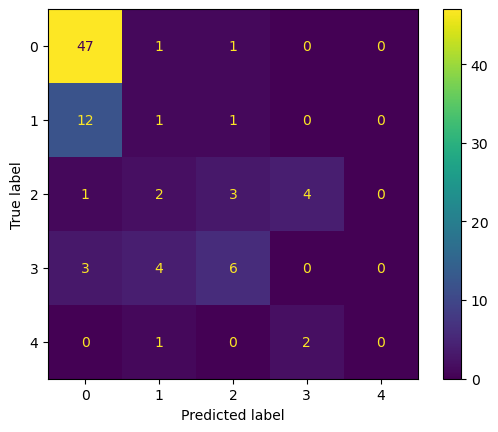

In [90]:
# mejor modelo (utilizando el vector conseguido anteriormente)
RF_mejor = RandomForestClassifier(criterion=RF_mejor_vector_parametros[0], max_features=RF_mejor_vector_parametros[1], class_weight=class_weights_int)
# dividimos las instancias 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=RF_mejor_vector_parametros[2], random_state=42, shuffle=True)
y_train=y_train.values.ravel()
# entrenamos el modelo
RF_mejor.fit(x_train, y_train)
# hacer predicciones
pred_RF_mejor = RF_mejor.predict(x_test)
# informe
print(classification_report(y_test,pred_RF_mejor,zero_division=1))
# cross value
kfold = StratifiedKFold(10)
score = cross_val_score(
    RF_mejor, x_train, y_train, cv=kfold, scoring="accuracy"
)
RF_mejor_prec=score.mean()
print("cross_value: ", RF_mejor_prec)
# matriz de confusión
mat_conf = confusion_matrix(y_test, pred_RF_mejor)
ConfusionMatrixDisplay(mat_conf).plot()
plt.show()

## Redes neuronales

Epoch 1/10
8/8 [==============================] - 2s 57ms/step - loss: 1.7125 - accuracy: 0.1229 - val_loss: 1.5489 - val_accuracy: 0.2667
Epoch 2/10
8/8 [==============================] - 0s 12ms/step - loss: 1.4536 - accuracy: 0.4746 - val_loss: 1.3218 - val_accuracy: 0.6667
Epoch 3/10
8/8 [==============================] - 0s 12ms/step - loss: 1.2845 - accuracy: 0.5551 - val_loss: 1.1495 - val_accuracy: 0.6333
Epoch 4/10
8/8 [==============================] - 0s 12ms/step - loss: 1.1670 - accuracy: 0.5593 - val_loss: 1.0319 - val_accuracy: 0.6500
Epoch 5/10
8/8 [==============================] - 0s 12ms/step - loss: 1.0762 - accuracy: 0.5763 - val_loss: 0.9581 - val_accuracy: 0.6333
Epoch 6/10
8/8 [==============================] - 0s 11ms/step - loss: 1.0176 - accuracy: 0.6102 - val_loss: 0.9039 - val_accuracy: 0.6167
Epoch 7/10
8/8 [==============================] - 0s 12ms/step - loss: 0.9703 - accuracy: 0.6186 - val_loss: 0.8679 - val_accuracy: 0.6667
Epoch 8/10
8/8 [===========

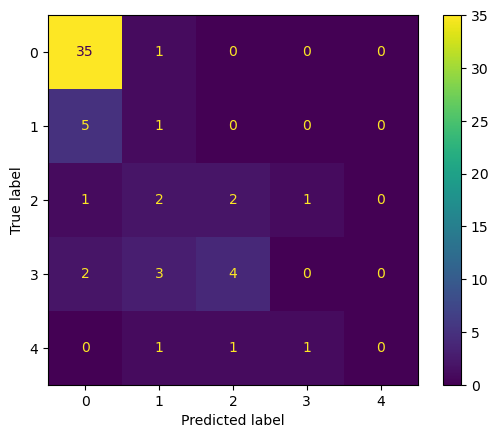

Epoch 1/10
8/8 [==============================] - 1s 60ms/step - loss: 0.8648 - accuracy: 0.6568 - val_loss: 0.8177 - val_accuracy: 0.6333
Epoch 2/10
8/8 [==============================] - 0s 6ms/step - loss: 0.8619 - accuracy: 0.6653 - val_loss: 0.8168 - val_accuracy: 0.6500
Epoch 3/10
8/8 [==============================] - 0s 6ms/step - loss: 0.8588 - accuracy: 0.6695 - val_loss: 0.8141 - val_accuracy: 0.6500
Epoch 4/10
8/8 [==============================] - 0s 6ms/step - loss: 0.8562 - accuracy: 0.6653 - val_loss: 0.8117 - val_accuracy: 0.6500
Epoch 5/10
8/8 [==============================] - 0s 6ms/step - loss: 0.8541 - accuracy: 0.6695 - val_loss: 0.8117 - val_accuracy: 0.6500
Epoch 6/10
8/8 [==============================] - 0s 6ms/step - loss: 0.8512 - accuracy: 0.6737 - val_loss: 0.8100 - val_accuracy: 0.6500
Epoch 7/10
8/8 [==============================] - 0s 6ms/step - loss: 0.8486 - accuracy: 0.6653 - val_loss: 0.8091 - val_accuracy: 0.6667
Epoch 8/10
8/8 [=================

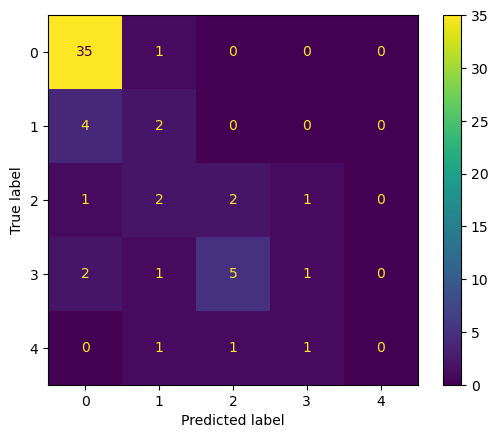

Epoch 1/10
8/8 [==============================] - 1s 26ms/step - loss: 0.8536 - accuracy: 0.6441 - val_loss: 0.8159 - val_accuracy: 0.6500
Epoch 2/10
8/8 [==============================] - 0s 6ms/step - loss: 0.8189 - accuracy: 0.6525 - val_loss: 0.8099 - val_accuracy: 0.6667
Epoch 3/10
8/8 [==============================] - 0s 6ms/step - loss: 0.7950 - accuracy: 0.6907 - val_loss: 0.7932 - val_accuracy: 0.6667
Epoch 4/10
8/8 [==============================] - 0s 12ms/step - loss: 0.7811 - accuracy: 0.6864 - val_loss: 0.8010 - val_accuracy: 0.6667
Epoch 5/10
8/8 [==============================] - 0s 10ms/step - loss: 0.7682 - accuracy: 0.6907 - val_loss: 0.8065 - val_accuracy: 0.6667
Epoch 6/10
8/8 [==============================] - 0s 10ms/step - loss: 0.7551 - accuracy: 0.6949 - val_loss: 0.8035 - val_accuracy: 0.6667
Epoch 7/10
8/8 [==============================] - 0s 10ms/step - loss: 0.7423 - accuracy: 0.6992 - val_loss: 0.8175 - val_accuracy: 0.6667
Epoch 8/10
8/8 [=============

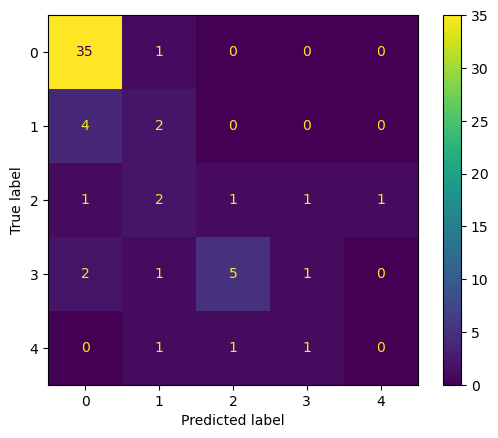

Epoch 1/10
8/8 [==============================] - 1s 26ms/step - loss: 0.6849 - accuracy: 0.7203 - val_loss: 0.8131 - val_accuracy: 0.6500
Epoch 2/10
8/8 [==============================] - 0s 6ms/step - loss: 0.6843 - accuracy: 0.7203 - val_loss: 0.8139 - val_accuracy: 0.6500
Epoch 3/10
8/8 [==============================] - 0s 5ms/step - loss: 0.6839 - accuracy: 0.7203 - val_loss: 0.8148 - val_accuracy: 0.6500
Epoch 4/10
8/8 [==============================] - 0s 6ms/step - loss: 0.6834 - accuracy: 0.7288 - val_loss: 0.8152 - val_accuracy: 0.6500
Epoch 5/10
8/8 [==============================] - 0s 6ms/step - loss: 0.6828 - accuracy: 0.7331 - val_loss: 0.8154 - val_accuracy: 0.6500
Epoch 6/10
8/8 [==============================] - 0s 6ms/step - loss: 0.6823 - accuracy: 0.7288 - val_loss: 0.8150 - val_accuracy: 0.6500
Epoch 7/10
8/8 [==============================] - 0s 6ms/step - loss: 0.6818 - accuracy: 0.7373 - val_loss: 0.8151 - val_accuracy: 0.6500
Epoch 8/10
8/8 [=================

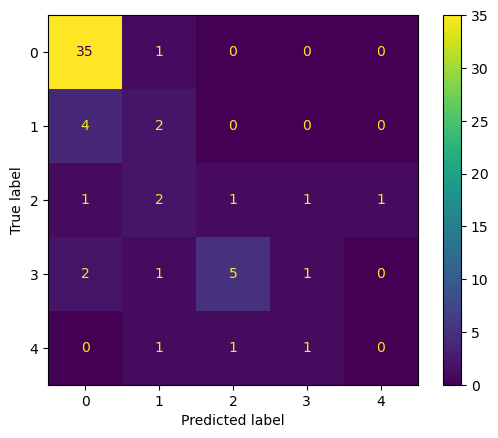

Epoch 1/10
8/8 [==============================] - 2s 57ms/step - loss: 0.6958 - accuracy: 0.7246 - val_loss: 0.8116 - val_accuracy: 0.6500
Epoch 2/10
8/8 [==============================] - 0s 11ms/step - loss: 0.6742 - accuracy: 0.7288 - val_loss: 0.8201 - val_accuracy: 0.6500
Epoch 3/10
8/8 [==============================] - 0s 12ms/step - loss: 0.6677 - accuracy: 0.7373 - val_loss: 0.8242 - val_accuracy: 0.6500
Epoch 4/10
8/8 [==============================] - 0s 11ms/step - loss: 0.6620 - accuracy: 0.7331 - val_loss: 0.8237 - val_accuracy: 0.6500
Epoch 5/10
8/8 [==============================] - 0s 11ms/step - loss: 0.6568 - accuracy: 0.7246 - val_loss: 0.8226 - val_accuracy: 0.6500
Epoch 6/10
8/8 [==============================] - 0s 12ms/step - loss: 0.6531 - accuracy: 0.7458 - val_loss: 0.8250 - val_accuracy: 0.6500
Epoch 7/10
8/8 [==============================] - 0s 12ms/step - loss: 0.6481 - accuracy: 0.7458 - val_loss: 0.8306 - val_accuracy: 0.6500
Epoch 8/10
8/8 [===========

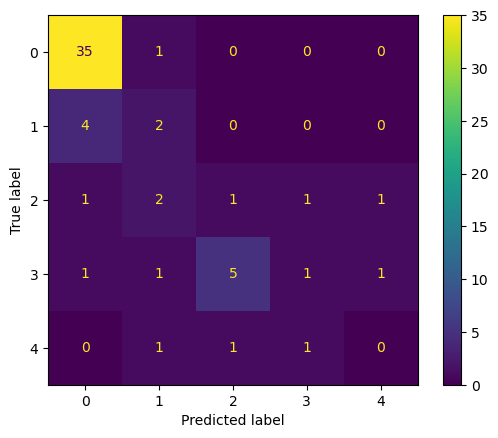

Epoch 1/10
8/8 [==============================] - 2s 58ms/step - loss: 1.5763 - accuracy: 0.3390 - val_loss: 1.4110 - val_accuracy: 0.6000
Epoch 2/10
8/8 [==============================] - 0s 13ms/step - loss: 1.3864 - accuracy: 0.5381 - val_loss: 1.2008 - val_accuracy: 0.6000
Epoch 3/10
8/8 [==============================] - 0s 13ms/step - loss: 1.2104 - accuracy: 0.5381 - val_loss: 1.0068 - val_accuracy: 0.6167
Epoch 4/10
8/8 [==============================] - 0s 13ms/step - loss: 1.0678 - accuracy: 0.5763 - val_loss: 0.8950 - val_accuracy: 0.6500
Epoch 5/10
8/8 [==============================] - 0s 12ms/step - loss: 0.9816 - accuracy: 0.6017 - val_loss: 0.8302 - val_accuracy: 0.6833
Epoch 6/10
8/8 [==============================] - 0s 13ms/step - loss: 0.9205 - accuracy: 0.6314 - val_loss: 0.8103 - val_accuracy: 0.7167
Epoch 7/10
8/8 [==============================] - 0s 13ms/step - loss: 0.8788 - accuracy: 0.6398 - val_loss: 0.8148 - val_accuracy: 0.7000
Epoch 8/10
8/8 [===========

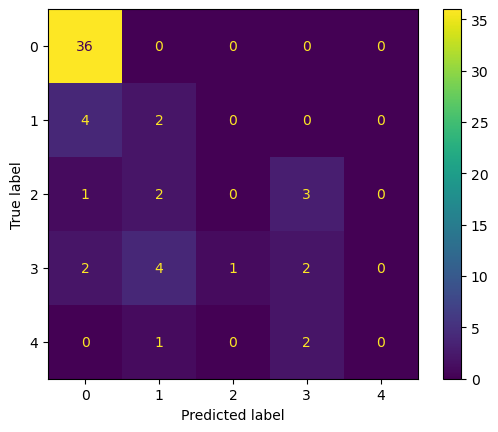

Epoch 1/10
8/8 [==============================] - 1s 59ms/step - loss: 0.7694 - accuracy: 0.7034 - val_loss: 0.8547 - val_accuracy: 0.6667
Epoch 2/10
8/8 [==============================] - 0s 12ms/step - loss: 0.7670 - accuracy: 0.6992 - val_loss: 0.8540 - val_accuracy: 0.6667
Epoch 3/10
8/8 [==============================] - 0s 12ms/step - loss: 0.7646 - accuracy: 0.7034 - val_loss: 0.8565 - val_accuracy: 0.6667
Epoch 4/10
8/8 [==============================] - 0s 12ms/step - loss: 0.7616 - accuracy: 0.7076 - val_loss: 0.8544 - val_accuracy: 0.6667
Epoch 5/10
8/8 [==============================] - 0s 12ms/step - loss: 0.7592 - accuracy: 0.6992 - val_loss: 0.8588 - val_accuracy: 0.6667
Epoch 6/10
8/8 [==============================] - 0s 12ms/step - loss: 0.7565 - accuracy: 0.7076 - val_loss: 0.8612 - val_accuracy: 0.6500
Epoch 7/10
8/8 [==============================] - 0s 12ms/step - loss: 0.7546 - accuracy: 0.7034 - val_loss: 0.8586 - val_accuracy: 0.6667
Epoch 8/10
8/8 [===========

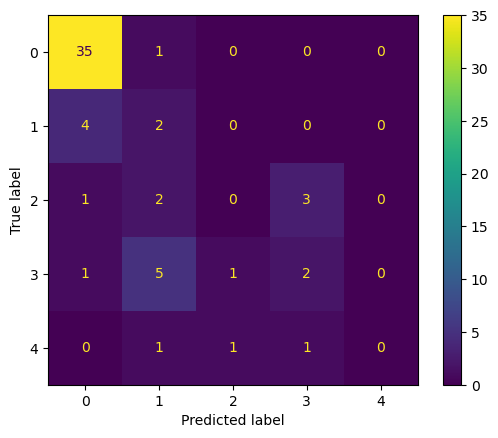

Epoch 1/10
8/8 [==============================] - 1s 27ms/step - loss: 0.7823 - accuracy: 0.6695 - val_loss: 0.8665 - val_accuracy: 0.6833
Epoch 2/10
8/8 [==============================] - 0s 6ms/step - loss: 0.7362 - accuracy: 0.6822 - val_loss: 0.8666 - val_accuracy: 0.6667
Epoch 3/10
8/8 [==============================] - 0s 6ms/step - loss: 0.7002 - accuracy: 0.7076 - val_loss: 0.9185 - val_accuracy: 0.5667
Epoch 4/10
8/8 [==============================] - 0s 6ms/step - loss: 0.6845 - accuracy: 0.7288 - val_loss: 0.8936 - val_accuracy: 0.6500
Epoch 5/10
8/8 [==============================] - 0s 6ms/step - loss: 0.6593 - accuracy: 0.7373 - val_loss: 0.9160 - val_accuracy: 0.6333
Epoch 6/10
8/8 [==============================] - 0s 6ms/step - loss: 0.6471 - accuracy: 0.7458 - val_loss: 0.9161 - val_accuracy: 0.6333
Epoch 7/10
8/8 [==============================] - 0s 6ms/step - loss: 0.6225 - accuracy: 0.7500 - val_loss: 0.9016 - val_accuracy: 0.6500
Epoch 8/10
8/8 [=================

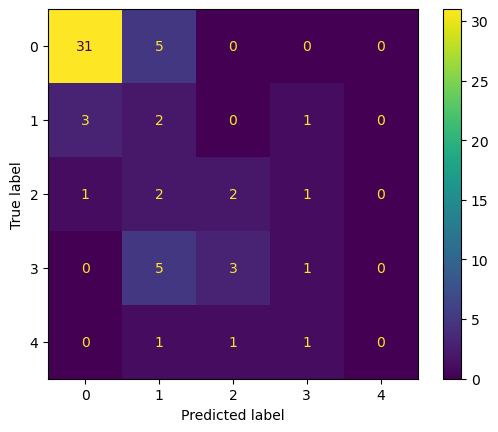

Epoch 1/10
8/8 [==============================] - 1s 25ms/step - loss: 0.5430 - accuracy: 0.8136 - val_loss: 1.0058 - val_accuracy: 0.6000
Epoch 2/10
8/8 [==============================] - 0s 6ms/step - loss: 0.5401 - accuracy: 0.8093 - val_loss: 0.9995 - val_accuracy: 0.5833
Epoch 3/10
8/8 [==============================] - 0s 6ms/step - loss: 0.5370 - accuracy: 0.8008 - val_loss: 0.9966 - val_accuracy: 0.5833
Epoch 4/10
8/8 [==============================] - 0s 6ms/step - loss: 0.5352 - accuracy: 0.8093 - val_loss: 0.9926 - val_accuracy: 0.5833
Epoch 5/10
8/8 [==============================] - 0s 6ms/step - loss: 0.5336 - accuracy: 0.8136 - val_loss: 0.9899 - val_accuracy: 0.5833
Epoch 6/10
8/8 [==============================] - 0s 6ms/step - loss: 0.5319 - accuracy: 0.8178 - val_loss: 0.9873 - val_accuracy: 0.5833
Epoch 7/10
8/8 [==============================] - 0s 6ms/step - loss: 0.5305 - accuracy: 0.8220 - val_loss: 0.9848 - val_accuracy: 0.5833
Epoch 8/10
8/8 [=================

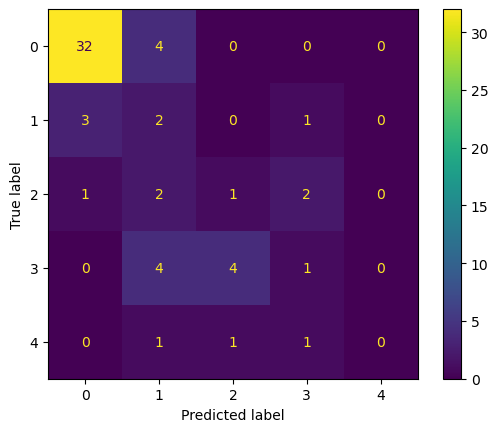

Epoch 1/10
8/8 [==============================] - 2s 60ms/step - loss: 0.5470 - accuracy: 0.7881 - val_loss: 0.9684 - val_accuracy: 0.6000
Epoch 2/10
8/8 [==============================] - 0s 12ms/step - loss: 0.5166 - accuracy: 0.8220 - val_loss: 0.9923 - val_accuracy: 0.5833
Epoch 3/10
8/8 [==============================] - 0s 12ms/step - loss: 0.5029 - accuracy: 0.8432 - val_loss: 1.0054 - val_accuracy: 0.6000
Epoch 4/10
8/8 [==============================] - 0s 12ms/step - loss: 0.4937 - accuracy: 0.8432 - val_loss: 1.0092 - val_accuracy: 0.5833
Epoch 5/10
8/8 [==============================] - 0s 13ms/step - loss: 0.4839 - accuracy: 0.8475 - val_loss: 1.0180 - val_accuracy: 0.5667
Epoch 6/10
8/8 [==============================] - 0s 13ms/step - loss: 0.4750 - accuracy: 0.8517 - val_loss: 1.0293 - val_accuracy: 0.5667
Epoch 7/10
8/8 [==============================] - 0s 13ms/step - loss: 0.4681 - accuracy: 0.8559 - val_loss: 1.0313 - val_accuracy: 0.5667
Epoch 8/10
8/8 [===========

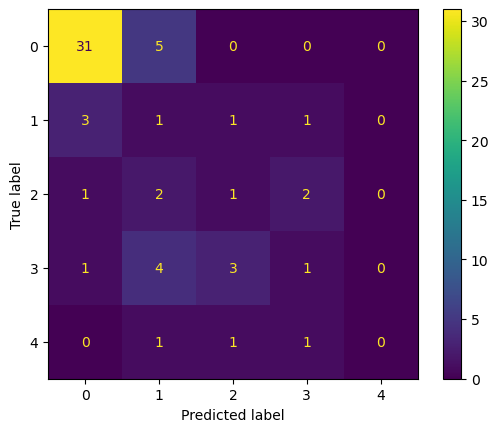

Epoch 1/10
8/8 [==============================] - 2s 62ms/step - loss: 1.5762 - accuracy: 0.3178 - val_loss: 1.4534 - val_accuracy: 0.5167
Epoch 2/10
8/8 [==============================] - 0s 13ms/step - loss: 1.3658 - accuracy: 0.5636 - val_loss: 1.2393 - val_accuracy: 0.6000
Epoch 3/10
8/8 [==============================] - 0s 12ms/step - loss: 1.1819 - accuracy: 0.5847 - val_loss: 1.0445 - val_accuracy: 0.6000
Epoch 4/10
8/8 [==============================] - 0s 13ms/step - loss: 1.0487 - accuracy: 0.5805 - val_loss: 0.9239 - val_accuracy: 0.6000
Epoch 5/10
8/8 [==============================] - 0s 13ms/step - loss: 0.9712 - accuracy: 0.5890 - val_loss: 0.8623 - val_accuracy: 0.6167
Epoch 6/10
8/8 [==============================] - 0s 13ms/step - loss: 0.9277 - accuracy: 0.6314 - val_loss: 0.8330 - val_accuracy: 0.6333
Epoch 7/10
8/8 [==============================] - 0s 13ms/step - loss: 0.8846 - accuracy: 0.6525 - val_loss: 0.8257 - val_accuracy: 0.6167
Epoch 8/10
8/8 [===========

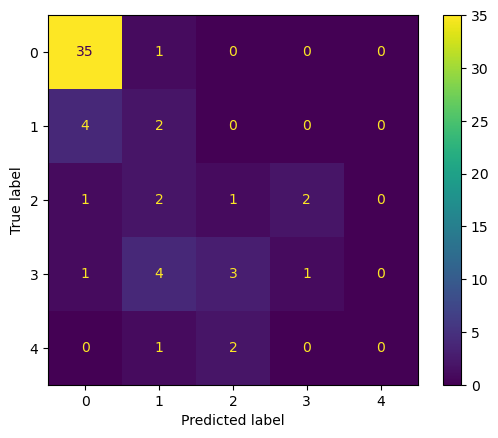

Epoch 1/10
8/8 [==============================] - 2s 61ms/step - loss: 0.7466 - accuracy: 0.7373 - val_loss: 0.7978 - val_accuracy: 0.6500
Epoch 2/10
8/8 [==============================] - 0s 13ms/step - loss: 0.7436 - accuracy: 0.7373 - val_loss: 0.8000 - val_accuracy: 0.6500
Epoch 3/10
8/8 [==============================] - 0s 12ms/step - loss: 0.7411 - accuracy: 0.7500 - val_loss: 0.7980 - val_accuracy: 0.6500
Epoch 4/10
8/8 [==============================] - 0s 12ms/step - loss: 0.7376 - accuracy: 0.7500 - val_loss: 0.8000 - val_accuracy: 0.6500
Epoch 5/10
8/8 [==============================] - 0s 12ms/step - loss: 0.7367 - accuracy: 0.7500 - val_loss: 0.8006 - val_accuracy: 0.6500
Epoch 6/10
8/8 [==============================] - 0s 12ms/step - loss: 0.7329 - accuracy: 0.7415 - val_loss: 0.8056 - val_accuracy: 0.6500
Epoch 7/10
8/8 [==============================] - 0s 12ms/step - loss: 0.7302 - accuracy: 0.7585 - val_loss: 0.8048 - val_accuracy: 0.6500
Epoch 8/10
8/8 [===========

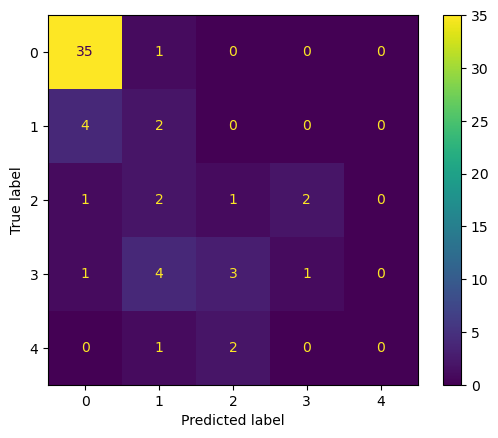

Epoch 1/10
8/8 [==============================] - 2s 62ms/step - loss: 0.7709 - accuracy: 0.6949 - val_loss: 0.8277 - val_accuracy: 0.6667
Epoch 2/10
8/8 [==============================] - 0s 7ms/step - loss: 0.7052 - accuracy: 0.7500 - val_loss: 0.8028 - val_accuracy: 0.6500
Epoch 3/10
8/8 [==============================] - 0s 8ms/step - loss: 0.6707 - accuracy: 0.7500 - val_loss: 0.8045 - val_accuracy: 0.6667
Epoch 4/10
8/8 [==============================] - 0s 6ms/step - loss: 0.6517 - accuracy: 0.7754 - val_loss: 0.8534 - val_accuracy: 0.6500
Epoch 5/10
8/8 [==============================] - 0s 6ms/step - loss: 0.6252 - accuracy: 0.7924 - val_loss: 0.8190 - val_accuracy: 0.6667
Epoch 6/10
8/8 [==============================] - 0s 6ms/step - loss: 0.5947 - accuracy: 0.7839 - val_loss: 0.8380 - val_accuracy: 0.6167
Epoch 7/10
8/8 [==============================] - 0s 6ms/step - loss: 0.5775 - accuracy: 0.7966 - val_loss: 0.8646 - val_accuracy: 0.6667
Epoch 8/10
8/8 [=================

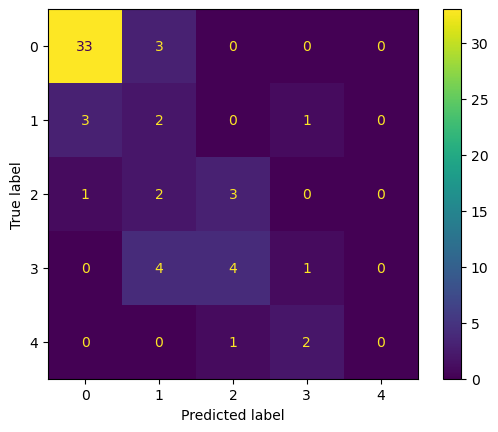

Epoch 1/10
8/8 [==============================] - 1s 29ms/step - loss: 0.4629 - accuracy: 0.8686 - val_loss: 0.9136 - val_accuracy: 0.6500
Epoch 2/10
8/8 [==============================] - 0s 7ms/step - loss: 0.4600 - accuracy: 0.8644 - val_loss: 0.9144 - val_accuracy: 0.6500
Epoch 3/10
8/8 [==============================] - 0s 6ms/step - loss: 0.4579 - accuracy: 0.8644 - val_loss: 0.9147 - val_accuracy: 0.6500
Epoch 4/10
8/8 [==============================] - 0s 6ms/step - loss: 0.4560 - accuracy: 0.8644 - val_loss: 0.9171 - val_accuracy: 0.6500
Epoch 5/10
8/8 [==============================] - 0s 6ms/step - loss: 0.4544 - accuracy: 0.8686 - val_loss: 0.9192 - val_accuracy: 0.6500
Epoch 6/10
8/8 [==============================] - 0s 6ms/step - loss: 0.4526 - accuracy: 0.8686 - val_loss: 0.9179 - val_accuracy: 0.6500
Epoch 7/10
8/8 [==============================] - 0s 6ms/step - loss: 0.4514 - accuracy: 0.8686 - val_loss: 0.9179 - val_accuracy: 0.6500
Epoch 8/10
8/8 [=================

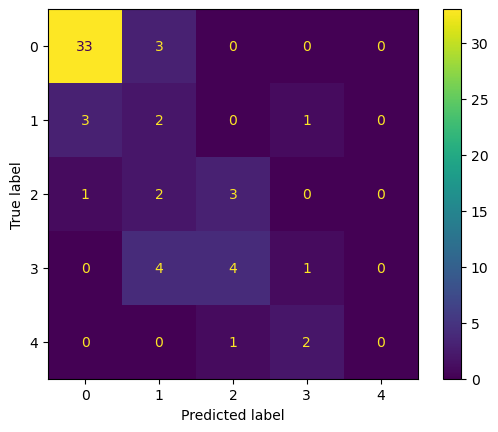

Epoch 1/10
8/8 [==============================] - 1s 63ms/step - loss: 0.4701 - accuracy: 0.8390 - val_loss: 0.9138 - val_accuracy: 0.6500
Epoch 2/10
8/8 [==============================] - 0s 12ms/step - loss: 0.4327 - accuracy: 0.8771 - val_loss: 0.9609 - val_accuracy: 0.6333
Epoch 3/10
8/8 [==============================] - 0s 13ms/step - loss: 0.4145 - accuracy: 0.8814 - val_loss: 0.9873 - val_accuracy: 0.6333
Epoch 4/10
8/8 [==============================] - 0s 13ms/step - loss: 0.4056 - accuracy: 0.8814 - val_loss: 0.9898 - val_accuracy: 0.6333
Epoch 5/10
8/8 [==============================] - 0s 12ms/step - loss: 0.3974 - accuracy: 0.8856 - val_loss: 0.9680 - val_accuracy: 0.6500
Epoch 6/10
8/8 [==============================] - 0s 13ms/step - loss: 0.3839 - accuracy: 0.8898 - val_loss: 0.9912 - val_accuracy: 0.6667
Epoch 7/10
8/8 [==============================] - 0s 13ms/step - loss: 0.3754 - accuracy: 0.8898 - val_loss: 0.9865 - val_accuracy: 0.6667
Epoch 8/10
8/8 [===========

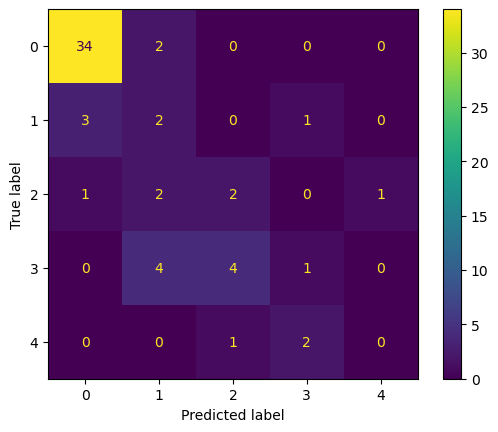

{0.6333333333333333: [1, 'adam'], 0.6666666666666666: [2, 'adam'], 0.65: [3, 'adamax'], 0.6: [2, 'adagrad'], 0.5666666666666667: [2, 'adamax']}
Mejores resultados con los parámetros: [2, 'adam']


In [91]:
optim = ["adam", "SGD", "RMSprop", "adagrad", "adamax"]
RN_combinaciones = {}

# Separa los atributos y las etiquetas de diagnóstico
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values 

# Divide los datos en conjuntos de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Escala los atributos para normalizarlos
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# ESTRUCTURA 1
RNmodel = Sequential()

# Agrega capas densas (totalmente conectadas) al modelo
RNmodel.add(Dense(64, activation='relu', input_shape=(13,)))  # Capa oculta 1
RNmodel.add(Dense(64, activation='relu'))  # Capa oculta 2
RNmodel.add(Dense(5, activation='softmax'))  # Capa de salida (5 valores posibles)

for i in optim:
    # Compila el modelo
    RNmodel.compile(optimizer=i, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Entrena el modelo
    RNmodel.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

    y_pred_prob = RNmodel.predict(x_test)
    y_pred = np.argmax(y_pred_prob, axis=1)

    # Calcular precisión
    precision = accuracy_score(y_test, y_pred)
    print("Precisión:", precision)

    # Calcular matriz de confusión
    matriz_confusion = confusion_matrix(y_test, y_pred)
    print("Matriz de confusión:")
    ConfusionMatrixDisplay(matriz_confusion).plot()
    plt.show()

    RN_combinaciones[precision] = [1, i]

# ESTRUCTURA 2
RNmodel = Sequential()

# Agrega capas densas (totalmente conectadas) al modelo
RNmodel.add(Dense(128, activation='relu', input_shape=(13,)))  # Capa oculta 1
RNmodel.add(Dense(64, activation='relu'))  # Capa oculta 2
RNmodel.add(Dense(32, activation='relu'))  # Capa oculta 3
RNmodel.add(Dense(5, activation='softmax'))  # Capa de salida (5 valores posibles)

for i in optim:
    # Compila el modelo
    RNmodel.compile(optimizer=i, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Entrena el modelo
    RNmodel.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

    y_pred_prob = RNmodel.predict(x_test)
    y_pred = np.argmax(y_pred_prob, axis=1)

    # Calcular precisión
    precision = accuracy_score(y_test, y_pred)
    print("Precisión:", precision)

    # Calcular matriz de confusión
    matriz_confusion = confusion_matrix(y_test, y_pred)
    print("Matriz de confusión:")
    ConfusionMatrixDisplay(matriz_confusion).plot()
    plt.show()

    RN_combinaciones[precision] = [2, i]

# ESTRUCTURA 3
RNmodel = Sequential()

# Agrega capas densas (totalmente conectadas) al modelo
RNmodel.add(Dense(64, activation='relu', input_shape=(13,)))  # Capa oculta 1
RNmodel.add(Dense(128, activation='relu'))  # Capa oculta 2
RNmodel.add(Dense(64, activation='relu'))  # Capa oculta 3
RNmodel.add(Dense(32, activation='relu'))  # Capa oculta 4
RNmodel.add(Dense(5, activation='softmax'))  # Capa de salida (5 valores posibles)

for i in optim:
    # Compila el modelo
    RNmodel.compile(optimizer=i, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Entrena el modelo
    RNmodel.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

    y_pred_prob = RNmodel.predict(x_test)
    y_pred = np.argmax(y_pred_prob, axis=1)

    # Calcular precisión
    precision = accuracy_score(y_test, y_pred)
    print("Precisión:", precision)

    # Calcular matriz de confusión
    matriz_confusion = confusion_matrix(y_test, y_pred)
    print("Matriz de confusión:")
    ConfusionMatrixDisplay(matriz_confusion).plot()
    plt.show()

    RN_combinaciones[precision] = [3, i]

print(RN_combinaciones)
# calculamos la precisión máxima
RN_max_prec = max(RN_combinaciones)
# miramos con qué parámetros se consigue esta precisión
RN_mejor_vector_parametros = RN_combinaciones[RN_max_prec]
print("Mejores resultados con los parámetros:", RN_mejor_vector_parametros)


Epoch 1/10
8/8 [==============================] - 2s 59ms/step - loss: 1.5935 - accuracy: 0.2627 - val_loss: 1.4125 - val_accuracy: 0.5833
Epoch 2/10
8/8 [==============================] - 0s 11ms/step - loss: 1.3549 - accuracy: 0.5339 - val_loss: 1.2069 - val_accuracy: 0.6000
Epoch 3/10
8/8 [==============================] - 0s 12ms/step - loss: 1.1840 - accuracy: 0.5297 - val_loss: 1.0567 - val_accuracy: 0.6000
Epoch 4/10
8/8 [==============================] - 0s 11ms/step - loss: 1.0780 - accuracy: 0.5339 - val_loss: 0.9506 - val_accuracy: 0.6000
Epoch 5/10
8/8 [==============================] - 0s 12ms/step - loss: 1.0002 - accuracy: 0.5678 - val_loss: 0.8794 - val_accuracy: 0.6500
Epoch 6/10
8/8 [==============================] - 0s 11ms/step - loss: 0.9499 - accuracy: 0.6229 - val_loss: 0.8373 - val_accuracy: 0.6667
Epoch 7/10
8/8 [==============================] - 0s 11ms/step - loss: 0.9056 - accuracy: 0.6441 - val_loss: 0.8186 - val_accuracy: 0.6667
Epoch 8/10
8/8 [===========

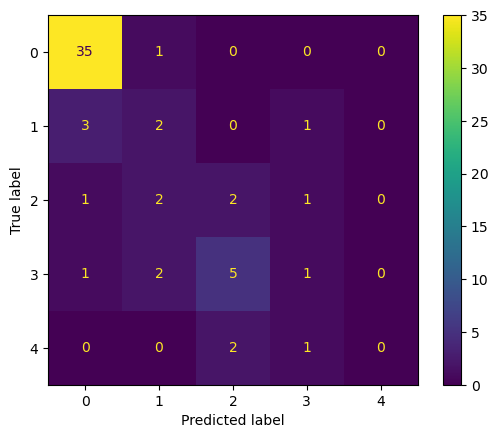

In [96]:
# Mejor modelo

RNmodel_mejor = Sequential()

if RN_mejor_vector_parametros[0]==1:
    RNmodel_mejor.add(Dense(64, activation='relu', input_shape=(13,)))  # Capa oculta 1
    RNmodel_mejor.add(Dense(64, activation='relu'))  # Capa oculta 2
    RNmodel.add(Dense(5, activation='softmax'))  # Capa de salida (5 valores posibles)
elif RN_mejor_vector_parametros[0]==2:
    RNmodel_mejor.add(Dense(128, activation='relu', input_shape=(13,)))  # Capa oculta 1
    RNmodel_mejor.add(Dense(64, activation='relu'))  # Capa oculta 2
    RNmodel_mejor.add(Dense(32, activation='relu'))  # Capa oculta 3
    RNmodel_mejor.add(Dense(5, activation='softmax'))  # Capa de salida (5 valores posibles)
elif RN_mejor_vector_parametros[0]==3:
    RNmodel_mejor.add(Dense(64, activation='relu', input_shape=(13,)))  # Capa oculta 1
    RNmodel_mejor.add(Dense(128, activation='relu'))  # Capa oculta 2
    RNmodel_mejor.add(Dense(64, activation='relu'))  # Capa oculta 3
    RNmodel_mejor.add(Dense(32, activation='relu'))  # Capa oculta 4
    RNmodel_mejor.add(Dense(5, activation='softmax'))  # Capa de salida (5 valores posibles)
# Compila el modelo
RNmodel_mejor.compile(optimizer=RN_mejor_vector_parametros[1], loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entrena el modelo
RNmodel_mejor.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

y_pred_prob = RNmodel_mejor.predict(x_test)
y_pred = np.argmax(y_pred_prob, axis=1)

# Calcular precisión
RN_mejor_prec = accuracy_score(y_test, y_pred)
print("Precisión:", RN_mejor_prec)

# Calcular matriz de confusión
matriz_confusion = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
ConfusionMatrixDisplay(matriz_confusion).plot()
plt.show()

## KNN

[5, 0.5635638297872341]


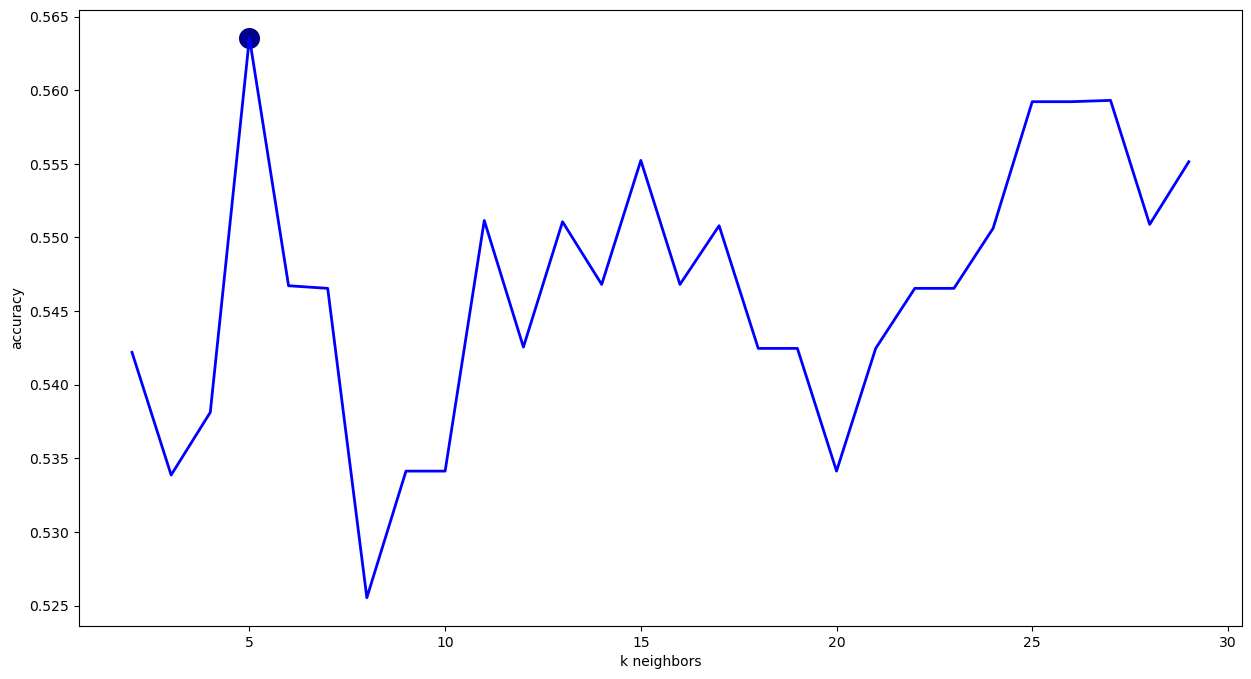

In [97]:
avg_score=[]
max_score=0
best_k=0
for k in range(2,30):
    knn_model=KNeighborsClassifier(n_jobs=-1,n_neighbors=k)
    score=cross_val_score(knn_model,x_train,y_train,cv=5,scoring='accuracy')
    if score.mean()>max_score:
        max_score=score.mean()
        best_k=k
    avg_score.append(score.mean())

print([best_k,max(avg_score)])

max_index = avg_score.index(max(avg_score))
max_value = max(avg_score)

plt.figure(figsize=(15, 8))
plt.plot(range(2, 30), avg_score, color='blue', linewidth=2)  
plt.scatter(max_index+2, max_value, color='darkblue', marker='o', s=200)  
plt.xlabel("k neighbors")
plt.ylabel("accuracy")

plt.show()

              precision    recall  f1-score   support

           0       0.81      0.94      0.87        36
           1       0.20      0.33      0.25         6
           2       0.33      0.33      0.33         6
           3       0.00      0.00      0.00         9
           4       0.00      0.00      0.00         3

    accuracy                           0.63        60
   macro avg       0.27      0.32      0.29        60
weighted avg       0.54      0.63      0.58        60

cross_value:  0.5552536231884058


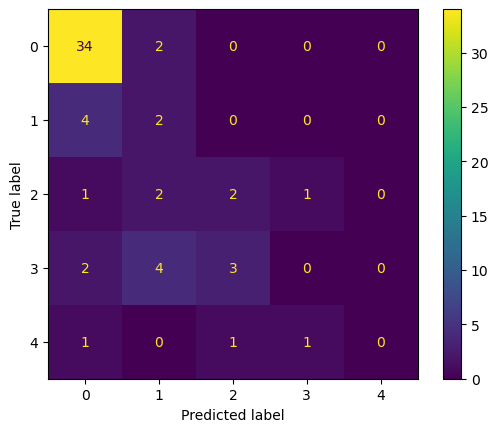

In [98]:
# modelo
KNN=KNeighborsClassifier(n_neighbors=best_k)
# entrenamos el modelo
KNN.fit(x_train,y_train)
# hacer predicciones
pred_KNN = KNN.predict(x_test)
# informe
print(classification_report(y_test,pred_KNN,zero_division=0))
# cross value
kfold = StratifiedKFold(10)
score = cross_val_score(
    KNN, x_train, y_train, cv=kfold, scoring="accuracy"
)
KNN_prec=score.mean()
print("cross_value: ", KNN_prec)
# matriz de confusión
mat_conf = confusion_matrix(y_test, pred_KNN)
ConfusionMatrixDisplay(mat_conf).plot()
plt.show()

# DIAGNOSIS

In [ ]:
nombre_v=str(input("Ahora introduciras los datos médicos del paciente con nombre o identificador: "))

age_v=int(input("edad en años: "))
sex_v=int(input("sexo (0=mujer)(1=hombre): "))
cp_v=int(input("tipo de angina (1=típico)(2=atípico)(3=no es angina)(4=asintomático): "))
trestbps_v=int(input("presión sanguínea entre latidos en mm Hg: "))
chol_v=int(input("colesterol en sangre en mg/dL: "))
fbs_v=int(input("glucosa en sangre en ayunas (0=menos de 120 mg/dL)(1=más de 120 mg/dL): "))
restecg_v=int(input("reultado electrocardiográfico en reposo (0=normal)(1=anormal en la onda ST-T)(2=hipertrofia ventricular izq): "))
thalach_v=int(input("frecuencia carduaca máxima durante el ejercicio: "))
exang_v=int(input("angina durante el ejercicio (0=no)(1=sí): "))
oldpeak_v=float(input("diferencia de altura del segmento ST: "))
slope_v=int(input("pendiente del segmento ST durante el ejercicio máximo (1=ascendente)(2=plano)(3=descendente): "))
ca_v=int(input("número de vasos principales colorados durante la fluoroscopia (de 0 a 3): "))
thal_v=int(input("diagnóstico de la enfermedad cardiaca (3=sin defectos)(6=defecto fijo)(7=defecto reversible): "))

In [99]:
pac=[age_v, sex_v, cp_v, trestbps_v,chol_v,fbs_v,restecg_v,thalach_v, exang_v, oldpeak_v, slope_v, ca_v, thal_v]
#pac=[65,1,4,162,287,0,2,107,1,1.5,2,3,3]
#nombre_v="Aitor"

#Crear los DataFrames que necesitaremos
df_diagnostico = pd.DataFrame(columns=['Método', 'Características', 'Precisión', 'Diagnóstico'])

df_datos=pd.DataFrame({'medida':['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal'],
                     'valor':pac})

df_nombre=pd.DataFrame({'nombre':[nombre_v]})

# Predecir diagnóstico con diferentes métodos
DT_predict=int(DT_mejor.predict([pac]))
RF_predict=int(RF_mejor.predict([pac]))
pac_scaled = scaler.transform([pac])  # Escala el vector pac
y_pred_prob = RNmodel_mejor.predict(pac_scaled)
RN_predict = np.argmax(y_pred_prob, axis=1)
KNN_predict=int(KNN.predict([pac]))
    
df_diagnostico = df_diagnostico.append({'Método': 'Árbol de decisión', 'Características': DT_mejor_vector_parametros, 'Precisión': DT_mejor_prec, 'Diagnóstico': DT_predict}, ignore_index=True)
df_diagnostico = df_diagnostico.append({'Método': 'Random Forest', 'Características': RF_mejor_vector_parametros, 'Precisión': RF_mejor_prec, 'Diagnóstico': RF_predict}, ignore_index=True)
df_diagnostico = df_diagnostico.append({'Método': 'Redes neuronales', 'Características': RN_mejor_vector_parametros, 'Precisión': RN_mejor_prec, 'Diagnóstico': RN_predict[0]}, ignore_index=True)
df_diagnostico = df_diagnostico.append({'Método': 'KNN', 'Características': 'K='+ str(best_k), 'Precisión': KNN_prec, 'Diagnóstico': KNN_predict}, ignore_index=True)

df_diagnostico

1/1 [==============================] - 0s 42ms/step


C:\Users\Magali\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Magali\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Magali\AppData\Local\Temp\ipykernel_13852\3313134700.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_diagnostico = df_diagnostico.append({'Método': 'Árbol de decisión', 'Características': DT_mejor_vector_parametros, 'Precisión': DT_mejor_prec, 'Diagnóstico': DT_predict}, ignore_index=True)
C:\Users\Magali\AppData\Local\Temp\ipykernel_13852\3313134700.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_diagnostico = df_d

,Método,Características,Precisión,Diagnóstico
0,Árbol de decisión,"[entropy, sqrt, best, 0.3]",0.410476,2
1,Random Forest,"[gini, log2, 0.3]",0.565952,2
2,Redes neuronales,"[2, adam]",0.666667,2
3,KNN,K=5,0.555254,0


In [100]:
#Guardamos los dataset como csv
df_datos.to_csv("datospac_cardiopatia_py.csv", index=False)
df_diagnostico.to_csv("diagnostico_cardiopatia_py.csv", index=False)
df_nombre.to_csv("nombrepac_cardiopatia_py.csv", index=False)